In [1]:
import awkward as ak
import uproot
from glob import glob
import numpy as np

import hist as hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.colors as mcolors

import os

In [3]:
beam15 = []
beam20 = []
beam15list = []
beam20list = []
beamlist = ["15","20"]
masslist = ["0.3","0.5","0.7","0.9"]
for beam in beamlist:
    for mass in masslist:
        sim = "data/iron/" + beam + "beam" + mass + "mass_hepmc.root"
        print(sim)
        truth = uproot.open(sim)["Events"]
        todo = ["track_px_st1"]
        for strr in todo:
            num = len(truth[strr].array())
            filled = 0
            list = []
            for i in range(num):
                if len(truth[strr].array()[i]) != 0:
                    filled += 1
                    list.append(len(truth[strr].array()[i]))
            print(strr, ':reconstruction efficiency=',filled/num)
            if beam == "15":
                beam15.append(filled/num)
                beam15list.append(list)
            else:
                beam20.append(filled/num)
                beam20list.append(list)

data/iron/15beam0.3mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.9642
data/iron/15beam0.5mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.942
data/iron/15beam0.7mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.9084
data/iron/15beam0.9mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.8658
data/iron/20beam0.3mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.9632
data/iron/20beam0.5mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.9842
data/iron/20beam0.7mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.9792
data/iron/20beam0.9mass_hepmc.root
track_px_st1 :reconstruction efficiency= 0.9646


In [5]:
beam15_1=[]
beam20_1=[]
beam15_2=[]
beam20_2=[]
beam15_3=[]
beam20_3=[]
for i in range(len(beam15list)):
    beam15_1.append(beam15list[i].count(1)/num)
    beam15_2.append(beam15list[i].count(2)/num)
    beam15_3.append(beam15list[i].count(3)/num)
    beam20_1.append(beam20list[i].count(1)/num)
    beam20_2.append(beam20list[i].count(2)/num)
    beam20_3.append(beam20list[i].count(3)/num)

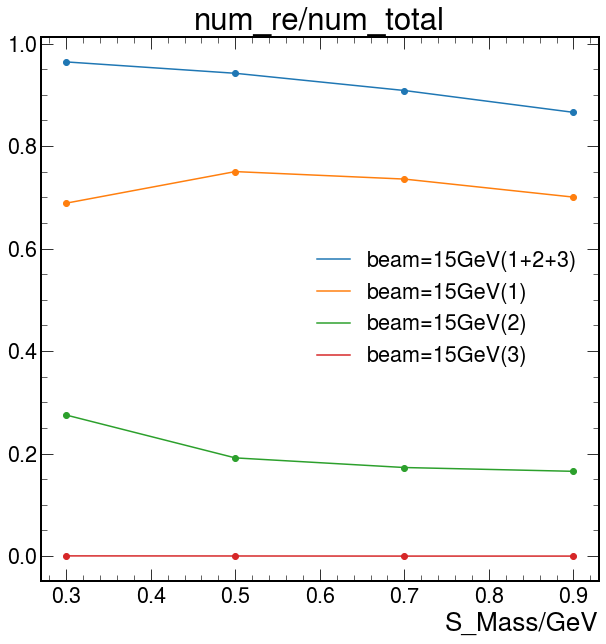

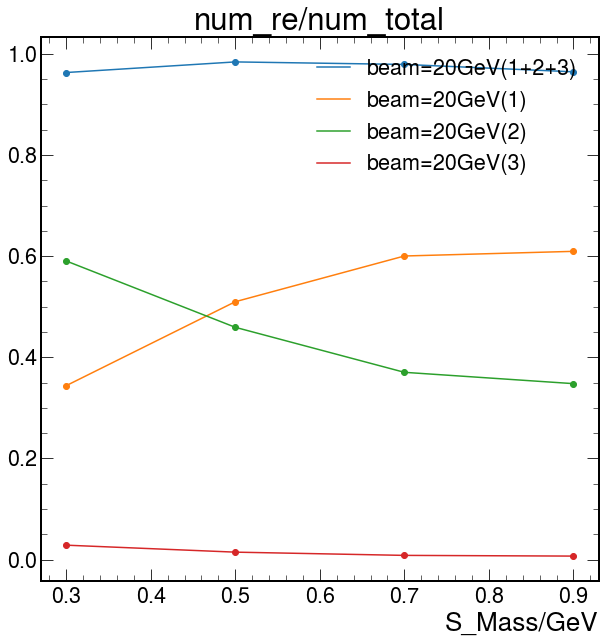

In [6]:
x = [0.3,0.5,0.7,0.9]
plt.scatter(x, beam15)
plt.plot(x, beam15, label = "beam=15GeV(1+2+3)")
plt.scatter(x, beam15_1)
plt.plot(x, beam15_1, label = "beam=15GeV(1)")
plt.scatter(x, beam15_2)
plt.plot(x, beam15_2, label = "beam=15GeV(2)")
plt.scatter(x, beam15_3)
plt.plot(x, beam15_3, label = "beam=15GeV(3)")
plt.title("num_re/num_total")
plt.xlabel('S_Mass/GeV')
plt.legend()
plt.show()

x = [0.3,0.5,0.7,0.9]
plt.scatter(x, beam20)
plt.plot(x, beam20, label = "beam=20GeV(1+2+3)")
plt.scatter(x, beam20_1)
plt.plot(x, beam20_1, label = "beam=20GeV(1)")
plt.scatter(x, beam20_2)
plt.plot(x, beam20_2, label = "beam=20GeV(2)")
plt.scatter(x, beam20_3)
plt.plot(x, beam20_3, label = "beam=20GeV(3)")
plt.title("num_re/num_total")
plt.xlabel('S_Mass/GeV')
plt.legend()
plt.show()

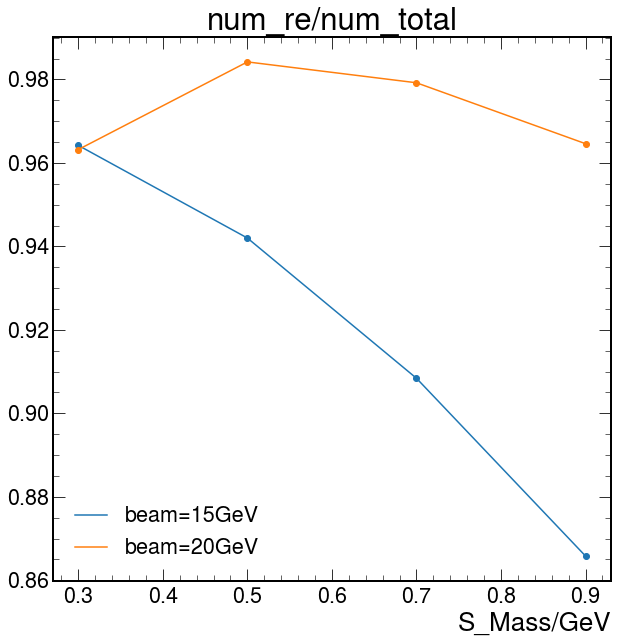

In [7]:
x = [0.3,0.5,0.7,0.9]
plt.scatter(x, beam15)
plt.plot(x, beam15, label = "beam=15GeV")
plt.scatter(x, beam20)
plt.plot(x, beam20,label = "beam=20GeV")
plt.title("num_re/num_total")
plt.xlabel('S_Mass/GeV')
plt.legend()
plt.show()

In [8]:

sim = "data/iron/15beam0.3mass_hepmc.txt.root"
truth = uproot.open(sim)["Events"]
# print(truth.keys()[:7])

# todo = ["track_px_st1","track_py_st1","track_pz_st1","track_px_st3","track_py_st3","track_pz_st3",]
todo = ["track_px_st1"]
for strr in todo:
    num = len(truth[strr].array())
    filled = 0
    for i in range(num):
        if len(truth[strr].array()[i]) != 0:
            filled += 1
    print(strr, ':reconstruction efficiency=',filled/num)

FileNotFoundError: file not found

    'data/iron/15beam0.3mass_hepmc.txt.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


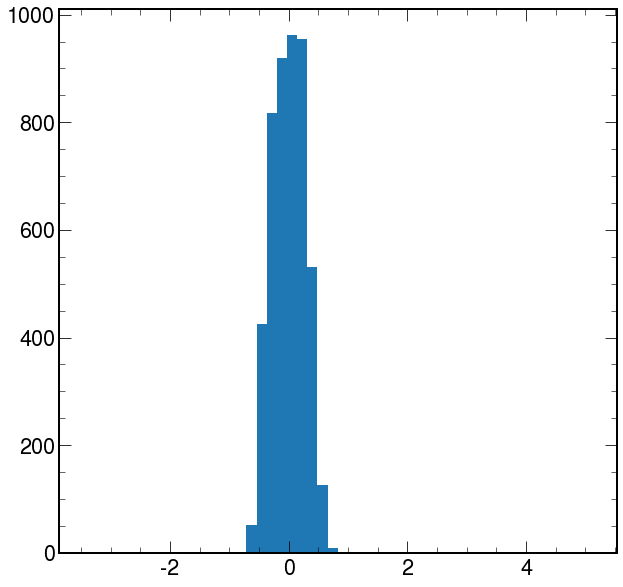

4823


In [9]:
aa = []
for i in range(num):
    if len(truth["track_px_st1"].array()[i]) != 0:
        aa.append(truth["track_px_st1"].array()[i][0])
bins = plt.hist(aa,bins = 50)
plt.show()
print(len(aa))

In [14]:
def getshape(name):
    if ak.to_numpy(truth[name].array()[0]).shape == ():
        y = ak.to_numpy(truth[name].array())
        print(name,': ',len(truth[name].array()))
    else:
        shape = []
        for i in range(5):
            shape.append(ak.to_numpy(truth[name].array()[i]).shape[0])
        print(name,': ',len(truth[name].array()), shape)
    return 0

plotname = ['eventID', 'n_hits', 'hit_detID', 'hit_elmID', 'hit_trkID', 'hit_driftdis', 'hit_pos', 'hit_edep', 'hit_truthx', 'hit_truthy', 'hit_truthz', 'hit_truthpx', 'hit_truthpy', 'hit_truthpz', 'n_truthtracks', 'truthtrack_charge', 'truthtrack_x_st1', 'truthtrack_y_st1', 'truthtrack_z_st1', 'truthtrack_px_st1', 'truthtrack_py_st1', 'truthtrack_pz_st1', 'truthtrack_x_st3', 'truthtrack_y_st3', 'truthtrack_z_st3', 'truthtrack_px_st3', 'truthtrack_py_st3', 'truthtrack_pz_st3', 'truthtrack_x_vtx', 'truthtrack_y_vtx', 'truthtrack_z_vtx', 'truthtrack_px_vtx', 'truthtrack_py_vtx', 'truthtrack_pz_vtx', 'n_tracks', 'track_charge', 'track_nhits', 'track_x_target', 'track_y_target', 'track_z_target', 'track_px_target', 'track_py_target', 'track_pz_target', 'track_x_st1', 'track_y_st1', 'track_z_st1', 'track_px_st1', 'track_py_st1', 'track_pz_st1', 'track_x_st3', 'track_y_st3', 'track_z_st3', 'track_px_st3', 'track_py_st3', 'track_pz_st3', 'track_x_vtx', 'track_y_vtx', 'track_z_vtx', 'track_px_vtx', 'track_py_vtx', 'track_pz_vtx', 'track_m', 'track_chisq', 'track_prob', 'track_quality', 'track_isValid', 'track_nhits_st1', 'track_nhits_st2', 'track_nhits_st3', 'n_truthdimuons', 'truthdimuon_mass', 'truthdimuon_x_vtx', 'truthdimuon_y_vtx', 'truthdimuon_z_vtx', 'truthdimuon_px', 'truthdimuon_py', 'truthdimuon_pz', 'truthdimuon_pmom_x', 'truthdimuon_pmom_y', 'truthdimuon_pmom_z', 'truthdimuon_nmom_x', 'truthdimuon_nmom_y', 'truthdimuon_nmom_z', 'n_dimuons', 'dimuon_mass', 'dimuon_chisq', 'dimuon_x_vtx', 'dimuon_y_vtx', 'dimuon_z_vtx', 'dimuon_px', 'dimuon_py', 'dimuon_pz', 'dimuon_pmom_x', 'dimuon_pmom_y', 'dimuon_pmom_z', 'dimuon_nmom_x', 'dimuon_nmom_y', 'dimuon_nmom_z', 'dimuon_ppos_x', 'dimuon_ppos_y', 'dimuon_ppos_z', 'dimuon_npos_x', 'dimuon_npos_y', 'dimuon_npos_z', 'n_showers', 'sx_ecal', 'sy_ecal', 'sz_ecal', 'sedep_ecal', 'n_primaries', 'gtrkid', 'gpid', 'gvx', 'gvy', 'gvz', 'gpx', 'gpy', 'gpz', 'gpt', 'geta', 'gphi', 'ge','gx_st1', 'gy_st1', 'gz_st1', 'gpx_st1', 'gpy_st1', 'gpz_st1', 'gx_st2', 'gy_st2', 'gz_st2', 'gpx_st2', 'gpy_st2', 'gpz_st2', 'gx_st3', 'gy_st3', 'gz_st3', 'gpx_st3', 'gpy_st3', 'gpz_st3', 'gx_h1', 'gy_h1', 'gz_h1', 'gpx_h1', 'gpy_h1', 'gpz_h1', 'gx_h2', 'gy_h2', 'gz_h2', 'gpx_h2', 'gpy_h2', 'gpz_h2', 'gx_h3', 'gy_h3', 'gz_h3', 'gpx_h3', 'gpy_h3', 'gpz_h3', 'gx_h4', 'gy_h4', 'gz_h4', 'gpx_h4', 'gpy_h4', 'gpz_h4', 'gx_p1', 'gy_p1', 'gz_p1', 'gpx_p1', 'gpy_p1', 'gpz_p1', 'fpga_trigger', 'weight']
for i in truth.keys():
    getshape(i)

eventID :  5000
totalTime :  5000
allRecoed :  5000
allCouldBeRecoed :  5000
numNonMatched :  5000
nTrueDM :  5000
nFakeDM :  5000
nFakeTracksTop2 :  5000
nRealTracks :  5000
mainDMRecoed :  5000
passHitCuts :  5000
n_hits :  5000
n_hits_h1x :  5000
n_hits_h2x :  5000
n_hits_h3x :  5000
n_hits_h4x :  5000
n_hits_d0x :  5000
n_hits_d2x :  5000
n_hits_d3px :  5000
n_hits_d3mx :  5000
n_hits_d0 :  5000
n_hits_d1 :  5000
n_hits_d2 :  5000
n_hits_d3p :  5000
n_hits_d3m :  5000
n_hits_dp1 :  5000
n_hits_dp2 :  5000
hit_detID :  5000 [90, 102, 132, 113, 78]
hit_elmID :  5000 [90, 102, 132, 113, 78]
hit_trkID :  5000 [90, 102, 132, 113, 78]
hit_driftdis :  5000 [90, 102, 132, 113, 78]
hit_pos :  5000 [90, 102, 132, 113, 78]
hit_edep :  5000 [90, 102, 132, 113, 78]
hit_truthx :  5000 [90, 102, 132, 113, 78]
hit_truthy :  5000 [90, 102, 132, 113, 78]
hit_truthz :  5000 [90, 102, 132, 113, 78]
hit_truthpx :  5000 [90, 102, 132, 113, 78]
hit_truthpy :  5000 [90, 102, 132, 113, 78]
hit_truthpz :  5

In [4]:
truth["fpga_trigger"].array()[0]

<Array [True, False, False, True, False] type='5 * bool'>

In [10]:
# depth_limit=1 preserves the sub structure of the arrays
# hits = ak.zip({"detID": truth["hit_detID"].array(),
#                "x": truth["hit_truthx"].array(),
#                "y": truth["hit_truthy"].array(),
#                "z": truth["hit_truthz"].array()
#               }, depth_limit=1)
# # an array of 10,000 arrays, one for each event
# hits.detID,len(hits.detID),len(hits.detID[0])

hits = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["hit_truthx"].array(),
               "y": truth["hit_truthy"].array(),
               "z": truth["hit_truthz"].array(),
               "px": truth["hit_truthpx"].array(),
               "py": truth["hit_truthpy"].array(),
               "pz": truth["hit_truthpz"].array(),
              }, depth_limit=1)


In [18]:
len(truth["hit_truthx"].array()[0])

90

In [16]:
len(truth["gpx"].array()[0])

3

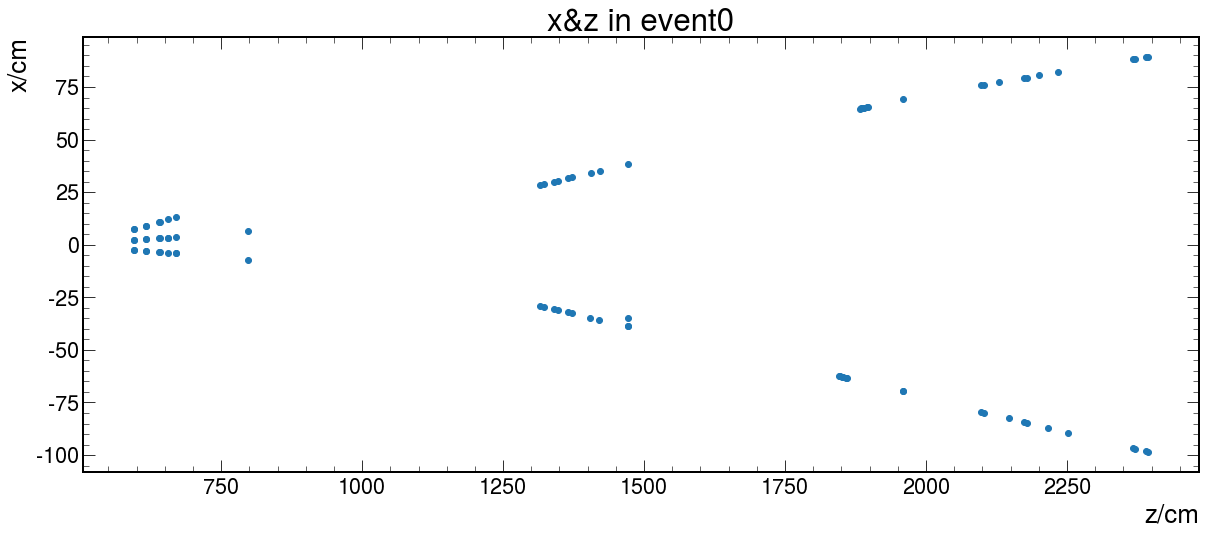

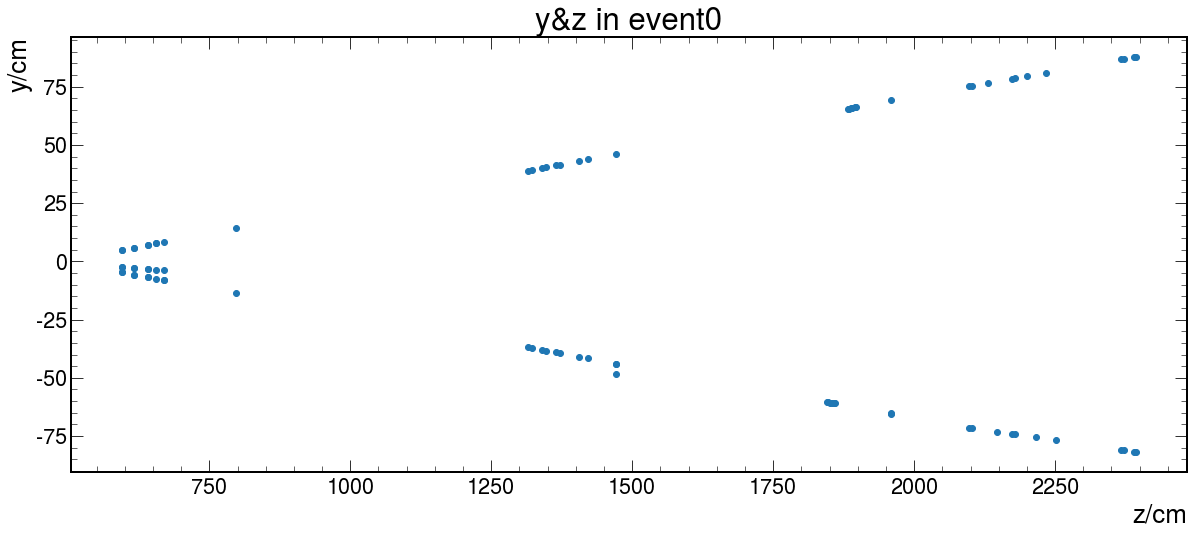

In [11]:
event_num = 0
x=hits.z[event_num]
y=hits.x[event_num]

ID=hits.detID[event_num]
xx=[]
yy=[]
for i in range(len(x)):
    if ID[i] != 100:
        xx.append(x[i])
        yy.append(y[i])
        
plt.figure(figsize=(20,8))        
plt.title('x&z in event'+str(event_num));
plt.xlabel('z/cm');
plt.ylabel('x/cm');
plt.scatter(xx,yy);
plt.show()

x=hits.z[0]
y=hits.y[0]

ID=hits.detID[0]
xx=[]
yy=[]
for i in range(len(x)):
    if ID[i] != 100:
        xx.append(x[i])
        yy.append(y[i])
        
plt.figure(figsize=(20,8))        
plt.title('y&z in event'+str(event_num));
plt.xlabel('z/cm');
plt.ylabel('y/cm');
plt.scatter(xx,yy);
plt.show()

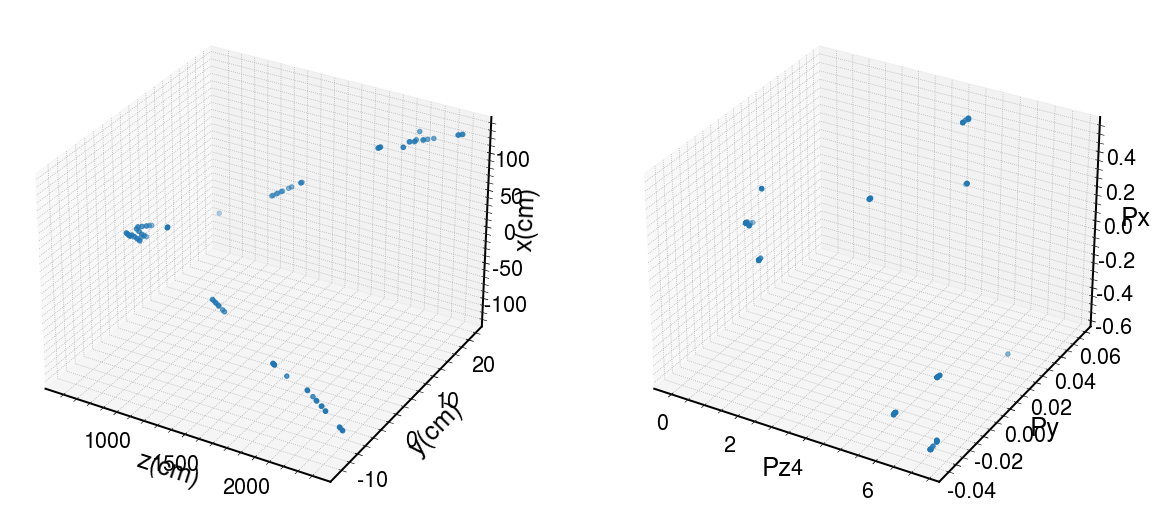

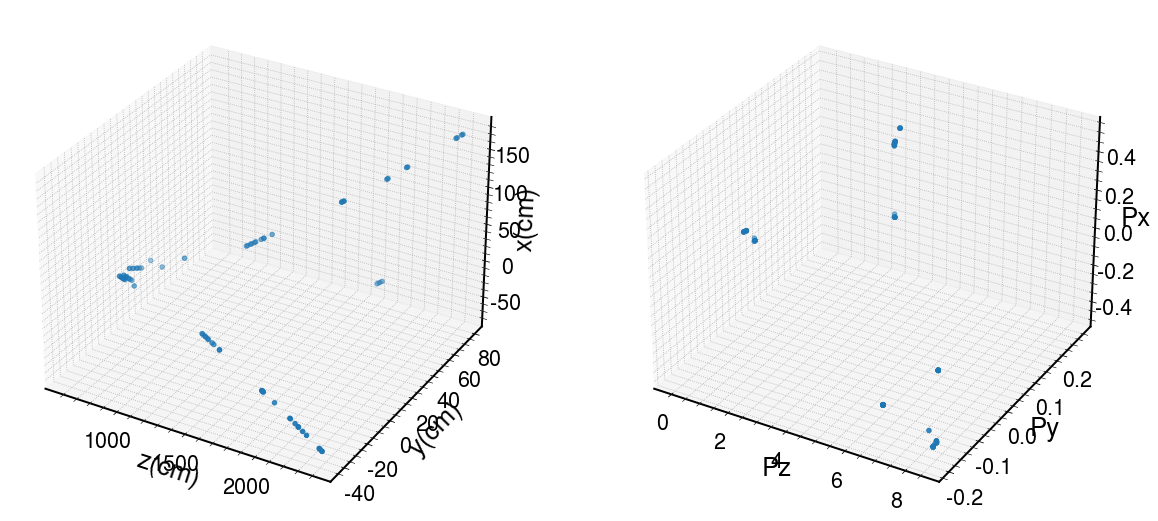

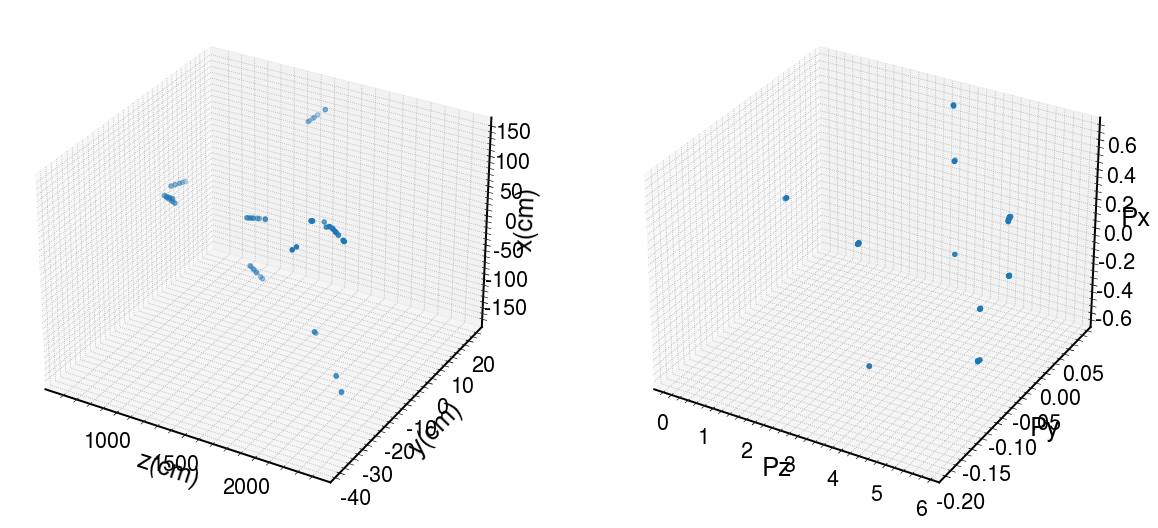

In [7]:
for num in range(3):
    x = hits.z[num]
    y = hits.y[num]
    z = hits.x[num]
    px = hits.pz[num]
    py = hits.py[num]
    pz = hits.px[num]

    ID=hits.detID[num]
    xx = []; pxx = []
    yy = []; pyy = []
    zz = []; pzz = []
    for i in range(len(x)):
        if ID[i] != 100:
            xx.append(x[i])
            yy.append(y[i])
            zz.append(z[i])
            pxx.append(px[i])
            pyy.append(py[i])
            pzz.append(pz[i])

    fig = plt.figure(figsize=(20,20))        
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel('z(cm)')
    ax.set_ylabel('y(cm)')
    ax.set_zlabel('x(cm)')
    ax.scatter3D(xx, yy, zz,);
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('Pz')
    ax.set_ylabel('Py')
    ax.set_zlabel('Px')
    ax.scatter3D(pxx, pyy, pzz,);
#     ax.plot3D(xx, yy, zz, 'gray')

In [61]:
df = truth.arrays(["track_px_st1","track_py_st1","track_pz_st1","track_px_st3","track_py_st3","track_pz_st3",],
                   library="pd")
df

,,track_px_st1,track_py_st1,track_pz_st1,track_px_st3,track_py_st3,track_pz_st3
entry,subentry,,,,,,
1,0,-0.180029,-0.228730,10.315729,-0.566205,-0.227278,10.302588
2,0,0.233828,-0.111317,7.671498,0.632980,-0.116944,7.857529
4,0,-0.239052,0.010736,7.204761,-0.624327,0.010609,7.170170
6,0,-0.281437,-0.123854,13.867455,-0.666857,-0.151642,13.791953
7,0,-0.203020,-0.113711,8.426732,-0.588341,-0.112925,8.391184
...,...,...,...,...,...,...,...
4971,0,0.210101,-0.071378,8.162511,0.579296,-0.049187,7.793403
4972,0,0.371286,0.032323,15.435896,0.809000,0.037119,16.710140
4975,0,0.190580,0.143241,7.320711,0.575742,0.142982,7.283194


In [60]:
df = truth.arrays(["truthtrack_px_st1","truthtrack_py_st1","truthtrack_pz_st1","truthtrack_px_st3","truthtrack_py_st3","truthtrack_pz_st3",],
                   library="pd")
df

truthtrack_px_st1  truthtrack_py_st1  truthtrack_pz_st1  \
entry subentry                                                            
0     0                 -0.163835          -0.040598           7.246223   
      1                  0.152036          -0.036337           2.026339   
      2                  0.086876           0.055921           4.317375   
1     0                 -0.079353          -0.175962           8.484315   
      1                  0.122126           0.102741           4.216587   
...                           ...                ...                ...   
4998  1                  0.037322           0.038299           5.400080   
      2                  0.000000           0.000000           0.000000   
4999  0                 -0.100668          -0.028406           9.143097   
      1                  0.152718          -0.097942           2.085374   
      2                  0.217152           0.014285           2.411952   

                truthtrack_px_st3  truthtrack_py_st3  truthtrack_pz_st3  
entry subentry                                                           
0     0                 -0.552022          -0.043800           7.217371  
      1                  0.000000           0.000000           0.000000  
      2                  0.459559           0.052963           4.275738  
1     0                 -0.465833          -0.184104           8.428276  
      1                  0.506663           0.107154           4.169278  
...                           ...                ...                ...  
4998  1                  0.423768           0.038125           5.374481  
      2                  0.000000           0.000000           0.000000  
4999  0                 -0.489151          -0.033604           9.115891  
      1                  0.000000           0.000000           0.000000  
      2                  0.000000           0.000000           0.000000  

[15000 rows x 6 columns]

In [8]:
df = truth.arrays([ 'gtrkid', 'gpid', 'gvx', 'gvy', 'gvz', 'gpx', 'gpy', 'gpz', 'gpt', 'geta', 'gphi', 'ge'],
                   library="pd")
df

gtrkid  gpid  gvx  gvy    gvz       gpx       gpy       gpz  \
entry subentry                                                                
0     0              1    13  0.0  0.0  490.0 -0.098886  0.000631  7.620331   
      1              2   -13  0.0  0.0  490.0  0.044096 -0.059367  2.426490   
      2              3   -13  0.0  0.0  490.0  0.065694  0.046638  4.946965   
1     0              1    13  0.0  0.0  490.0  0.027086 -0.074912  8.937771   
      1              2   -13  0.0  0.0  490.0  0.034760  0.106181  4.769825   
...                ...   ...  ...  ...    ...       ...       ...       ...   
4998  1              2   -13  0.0  0.0  490.0 -0.126838  0.033875  5.840406   
      2              3   -13  0.0  0.0  490.0  0.080146 -0.066874  0.415330   
4999  0              1    13  0.0  0.0  490.0 -0.141897  0.037038  9.687122   
      1              2   -13  0.0  0.0  490.0  0.014174 -0.045247  2.504864   
      2              3   -13  0.0  0.0  490.0  0.135213 -0.011557  2.798739   

                     gpt      geta      gphi        ge  
entry subentry                                          
0     0         0.098888  5.037779  3.135207  7.621705  
      1         0.073952  4.184164 -0.931933  2.429915  
      2         0.080566  4.810671  0.617352  4.948749  
1     0         0.079659  5.413455 -1.223847  8.938750  
      1         0.111725  4.447306  1.254426  4.772304  
...                  ...       ...       ...       ...  
4998  1         0.131283  4.488472  2.880614  5.842837  
      2         0.104382  2.089595 -0.695367  0.441087  
4999  0         0.146651  4.883699  2.886272  9.688808  
      1         0.047415  4.660290 -1.267226  2.507540  
      2         0.135706  3.720170 -0.085264  2.804018  

[15000 rows x 12 columns]

In [9]:
df = truth.arrays(['gtrkid', 'gpid', 'gvx', 'gvy', 'gvz', 'gpx', 'gpy', 'gpz', 'gpt', 'geta', 'gphi', 'ge', 'gx_st1', 'gy_st1', 'gz_st1', 'gpx_st1', 'gpy_st1', 'gpz_st1', 'gx_st2', 'gy_st2', 'gz_st2', 'gpx_st2', 'gpy_st2', 'gpz_st2', 'gx_st3', 'gy_st3', 'gz_st3', 'gpx_st3', 'gpy_st3', 'gpz_st3', 'gx_h1', 'gy_h1', 'gz_h1', 'gpx_h1', 'gpy_h1', 'gpz_h1', 'gx_h2', 'gy_h2', 'gz_h2', 'gpx_h2', 'gpy_h2', 'gpz_h2', 'gx_h3', 'gy_h3', 'gz_h3', 'gpx_h3', 'gpy_h3', 'gpz_h3', 'gx_h4', 'gy_h4', 'gz_h4', 'gpx_h4', 'gpy_h4', 'gpz_h4', 'gx_p1', 'gy_p1', 'gz_p1', 'gpx_p1', 'gpy_p1', 'gpz_p1', 'fpga_trigger', 'weight'],
                   library="pd")
df

gtrkid  gpid  gvx  gvy    gvz       gpx       gpy       gpz  \
entry subentry                                                                
0     0              1    13  0.0  0.0  490.0 -0.098886  0.000631  7.620331   
      1              2   -13  0.0  0.0  490.0  0.044096 -0.059367  2.426490   
      2              3   -13  0.0  0.0  490.0  0.065694  0.046638  4.946965   
1     0              1    13  0.0  0.0  490.0  0.027086 -0.074912  8.937771   
      1              2   -13  0.0  0.0  490.0  0.034760  0.106181  4.769825   
...                ...   ...  ...  ...    ...       ...       ...       ...   
4998  1              2   -13  0.0  0.0  490.0 -0.126838  0.033875  5.840406   
      2              3   -13  0.0  0.0  490.0  0.080146 -0.066874  0.415330   
4999  0              1    13  0.0  0.0  490.0 -0.141897  0.037038  9.687122   
      1              2   -13  0.0  0.0  490.0  0.014174 -0.045247  2.504864   
      2              3   -13  0.0  0.0  490.0  0.135213 -0.011557  2.798739   

                     gpt      geta  ...  gz_p1  gpx_p1  gpy_p1  gpz_p1  \
entry subentry                      ...                                  
0     0         0.098888  5.037779  ...    0.0     0.0     0.0     0.0   
      1         0.073952  4.184164  ...    0.0     0.0     0.0     0.0   
      2         0.080566  4.810671  ...    0.0     0.0     0.0     0.0   
1     0         0.079659  5.413455  ...    0.0     0.0     0.0     0.0   
      1         0.111725  4.447306  ...    0.0     0.0     0.0     0.0   
...                  ...       ...  ...    ...     ...     ...     ...   
4998  1         0.131283  4.488472  ...    0.0     0.0     0.0     0.0   
      2         0.104382  2.089595  ...    0.0     0.0     0.0     0.0   
4999  0         0.146651  4.883699  ...    0.0     0.0     0.0     0.0   
      1         0.047415  4.660290  ...    0.0     0.0     0.0     0.0   
      2         0.135706  3.720170  ...    0.0     0.0     0.0     0.0   

                fpga_trigger[0]  fpga_trigger[1]  fpga_trigger[2]  \
entry subentry                                                      
0     0                   False            False            False   
      1                   False            False            False   
      2                   False            False            False   
1     0                   False            False            False   
      1                   False            False            False   
...                         ...              ...              ...   
4998  1                   False            False            False   
      2                   False            False            False   
4999  0                   False            False            False   
      1                   False            False            False   
      2                   False            False            False   

                fpga_trigger[3]  fpga_trigger[4]  weight  
entry subentry                                            
0     0                    True            False     1.0  
      1                    True            False     1.0  
      2                    True            False     1.0  
1     0                    True            False     1.0  
      1                    True            False     1.0  
...                         ...              ...     ...  
4998  1                    True            False     1.0  
      2                    True            False     1.0  
4999  0                    True            False     1.0  
      1                    True            False     1.0  
      2                    True            False     1.0  

[15000 rows x 66 columns]

In [10]:
hits = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["hit_truthx"].array(),
               "y": truth["hit_truthy"].array(),
               "z": truth["hit_truthz"].array(),
               "px": truth["hit_truthpx"].array(),
               "py": truth["hit_truthpy"].array(),
               "pz": truth["hit_truthpz"].array(),
              }, depth_limit=1)

# an array of 10,000 arrays, one for each event

Tst1 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["truthtrack_x_st1"].array(),
               "y": truth["truthtrack_y_st1"].array(),
               "z": truth["truthtrack_z_st1"].array(),
               "px": truth["truthtrack_px_st1"].array(),
               "py": truth["truthtrack_py_st1"].array(),
               "pz": truth["truthtrack_pz_st1"].array(),
              }, depth_limit=1)
print('Tst1')
print(len(Tst1.detID),len(Tst1.detID[0]))
print('x',len(Tst1.x),len(Tst1.x[0]),Tst1.x[0])
print('px',len(Tst1.px),len(Tst1.px[0]),Tst1.px[0])
Tst3 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["truthtrack_x_st3"].array(),
               "y": truth["truthtrack_y_st3"].array(),
               "z": truth["truthtrack_z_st3"].array(),
               "px": truth["truthtrack_px_st3"].array(),
               "py": truth["truthtrack_py_st3"].array(),
               "pz": truth["truthtrack_pz_st3"].array(),
              }, depth_limit=1)

st1 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["track_x_st1"].array(),
               "y": truth["track_y_st1"].array(),
               "z": truth["track_z_st1"].array(),
               "px": truth["track_px_st1"].array(),
               "py": truth["track_py_st1"].array(),
               "pz": truth["track_pz_st1"].array(),
              }, depth_limit=1)
print('st1')
print(len(st1.detID),len(st1.detID[0]))
print('x',len(st1.x),len(st1.x[0]),st1.x[0])
print('px',len(st1.px),len(st1.px[0]),st1.px[0])
st3 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["track_x_st3"].array(),
               "y": truth["track_y_st3"].array(),
               "z": truth["track_z_st3"].array(),
               "px": truth["track_px_st3"].array(),
               "py": truth["track_py_st3"].array(),
               "pz": truth["track_pz_st3"].array(),
              }, depth_limit=1)

gst1 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["gx_st1"].array(),
               "y": truth["gy_st1"].array(),
               "z": truth["gz_st1"].array(),
               "px": truth["gpx_st1"].array(),
               "py": truth["gpy_st1"].array(),
               "pz": truth["gpz_st1"].array(),
              }, depth_limit=1)
gst2 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["gx_st2"].array(),
               "y": truth["gy_st2"].array(),
               "z": truth["gz_st2"].array(),
               "px": truth["gpx_st2"].array(),
               "py": truth["gpy_st2"].array(),
               "pz": truth["gpz_st2"].array(),
              }, depth_limit=1)
gst3 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["gx_st3"].array(),
               "y": truth["gy_st3"].array(),
               "z": truth["gz_st3"].array(),
               "px": truth["gpx_st3"].array(),
               "py": truth["gpy_st3"].array(),
               "pz": truth["gpz_st3"].array(),
              }, depth_limit=1)
gh1 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["gx_h1"].array(),
               "y": truth["gy_h1"].array(),
               "z": truth["gz_h1"].array(),
               "px": truth["gpx_h1"].array(),
               "py": truth["gpy_h1"].array(),
               "pz": truth["gpz_h1"].array(),
              }, depth_limit=1)
gh2 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["gx_h2"].array(),
               "y": truth["gy_h2"].array(),
               "z": truth["gz_h2"].array(),
               "px": truth["gpx_h2"].array(),
               "py": truth["gpy_h2"].array(),
               "pz": truth["gpz_h2"].array(),
              }, depth_limit=1)
gh3 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["gx_h3"].array(),
               "y": truth["gy_h3"].array(),
               "z": truth["gz_h3"].array(),
               "px": truth["gpx_h3"].array(),
               "py": truth["gpy_h3"].array(),
               "pz": truth["gpz_h3"].array(),
              }, depth_limit=1)
gh4 = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["gx_h4"].array(),
               "y": truth["gy_h4"].array(),
               "z": truth["gz_h4"].array(),
               "px": truth["gpx_h4"].array(),
               "py": truth["gpy_h4"].array(),
               "pz": truth["gpz_h4"].array(),
              }, depth_limit=1)


Tdimuon = ak.zip({"detID": truth["hit_detID"].array(),
               "mass": truth["truthdimuon_mass"].array(),
               "vx": truth["truthdimuon_x_vtx"].array(),
               "vy": truth["truthdimuon_y_vtx"].array(),
               "vz": truth["truthdimuon_z_vtx"].array(),
               "px": truth["truthdimuon_px"].array(),
               "py": truth["truthdimuon_py"].array(),
               "pz": truth["truthdimuon_pz"].array(),
               "pmomx": truth["truthdimuon_pmom_x"].array(),
               "pmomy": truth["truthdimuon_pmom_y"].array(),
               "pmomz": truth["truthdimuon_pmom_z"].array(),
              }, depth_limit=1)

dimuon = ak.zip({"detID": truth["hit_detID"].array(),
               "mass": truth["dimuon_mass"].array(),
               "vx": truth["dimuon_x_vtx"].array(),
               "vy": truth["dimuon_y_vtx"].array(),
               "vz": truth["dimuon_z_vtx"].array(),
               "px": truth["dimuon_px"].array(),
               "py": truth["dimuon_py"].array(),
               "pz": truth["dimuon_pz"].array(),
               "pmomx": truth["dimuon_pmom_x"].array(),
               "pmomy": truth["dimuon_pmom_y"].array(),
               "pmomz": truth["dimuon_pmom_z"].array(),
              }, depth_limit=1)
print('dimuon')
print('vx',len(dimuon.vx),len(dimuon.vx[0]),dimuon.vx[0])
print('px',len(dimuon.px),len(dimuon.px[0]),dimuon.px[0])
print(len(dimuon.pmomx),len(dimuon.pmomx[0]),dimuon.pmomx[0])

print('Tdimuon')
print('vx',len(Tdimuon.vx),len(Tdimuon.vx[0]),Tdimuon.vx[0])
print('px',len(Tdimuon.px),len(Tdimuon.px[0]),dimuon.px[0])
print(len(Tdimuon.pmomx),len(Tdimuon.pmomx[0]),Tdimuon.pmomx[0])
hittruth = ak.zip({"detID": truth["hit_detID"].array(),
               "x": truth["hit_truthx"].array(),
               "y": truth["hit_truthy"].array(),
               "z": truth["hit_truthz"].array()
              }, depth_limit=1)
print(len(st1.x),len(st1.x[0]))
print(len(st1.px),len(st1.px[0]))
parc = ak.zip({"gtrkid": truth["gtrkid"].array(),
               "px": truth["gpx"].array(),
               "py": truth["gpy"].array(),
               "pz": truth["gpz"].array(),
               "vx": truth["gvx"].array(),
               "vy": truth["gvy"].array(),
               "vz": truth["gvz"].array(),
              }, depth_limit=1)
print(parc.px[0],parc.px[1],len(parc.px))

Tst1
5000 110
x 5000 3 [-2.7, 8.19, 2.83]
px 5000 3 [-0.164, 0.152, 0.0869]
st1
5000 110
x 5000 0 []
px 5000 0 []
dimuon
vx 5000 0 []
px 5000 0 []
5000 0 []
Tdimuon
vx 5000 2 [0, 0]
px 5000 2 []
5000 2 [0.0441, 0.0657]
5000 0
5000 0
[-0.0989, 0.0441, 0.0657] [0.0271, 0.0348, -0.0778] 5000


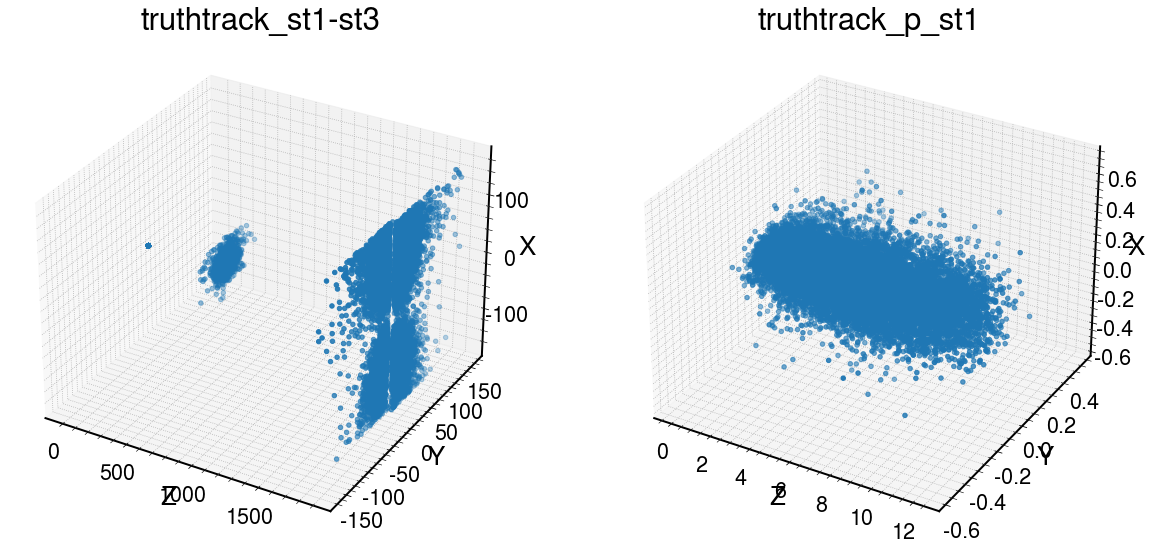

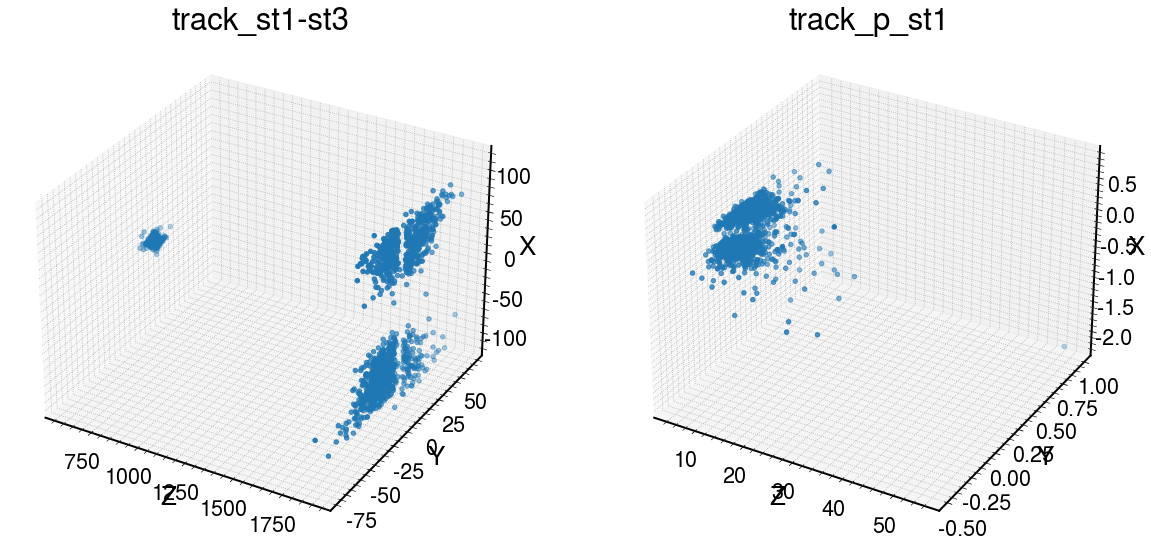

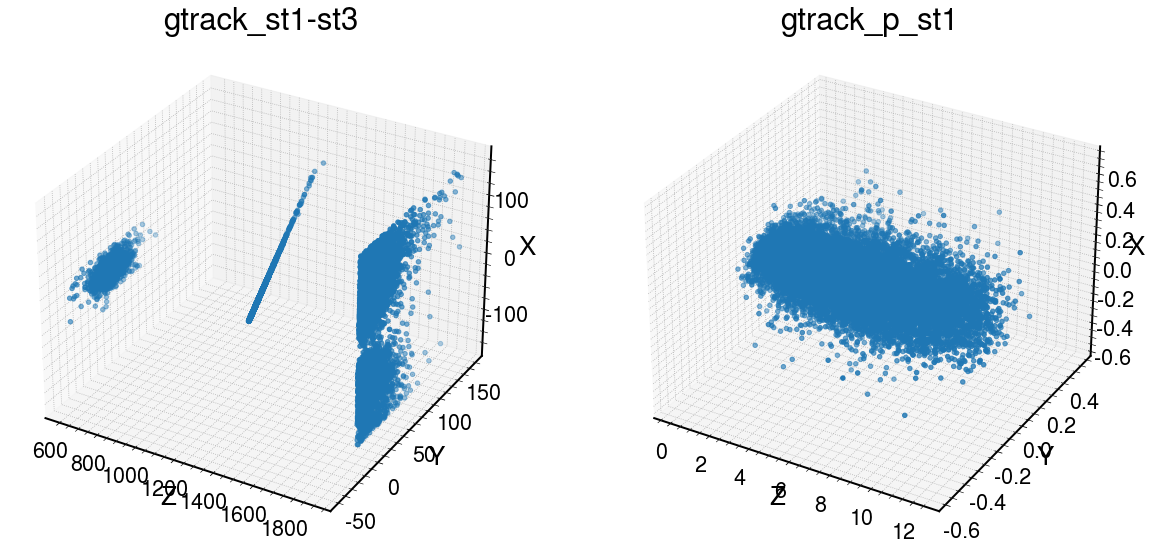

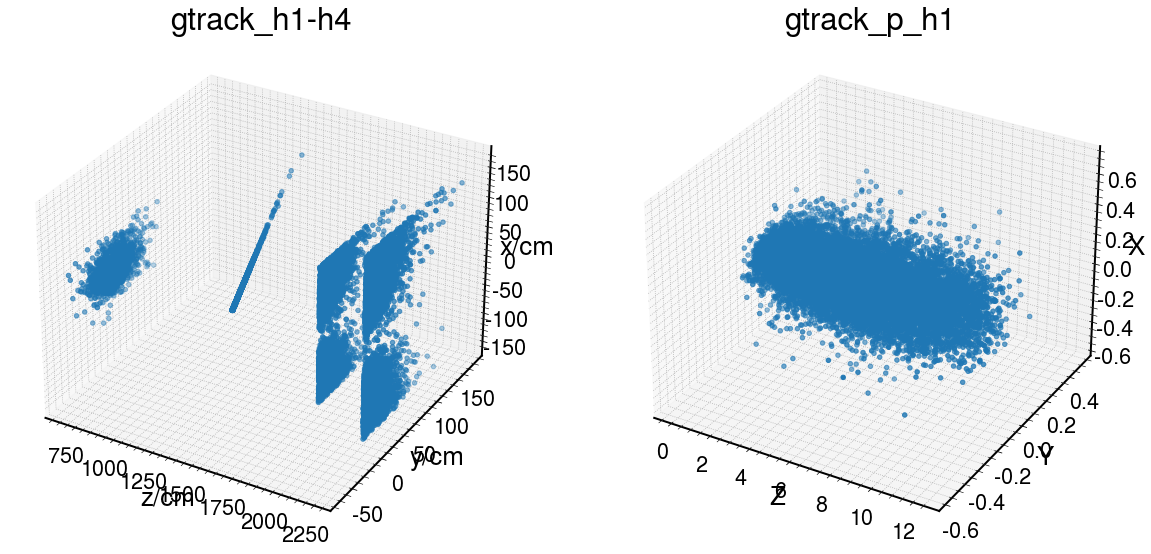

In [11]:
parc = ak.zip({"gtrkid": truth["gtrkid"].array(),
               "px": truth["gpx"].array(),
               "py": truth["gpy"].array(),
               "pz": truth["gpz"].array()
              }, depth_limit=1)
parc.px[0],parc.px[1]

z1 = ak.to_numpy(ak.flatten(Tst1.x))
y1 = ak.to_numpy(ak.flatten(Tst1.y))
x1 = ak.to_numpy(ak.flatten(Tst1.z))
z3 = ak.to_numpy(ak.flatten(Tst3.x))
y3 = ak.to_numpy(ak.flatten(Tst3.y))
x3 = ak.to_numpy(ak.flatten(Tst3.z))
x = np.concatenate((x1,x3))
y = np.concatenate((y1,y3))
z = np.concatenate((z1,z3))
# print(len(results),len(x))

fig = plt.figure(figsize=(20,10))        
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.title('truthtrack_st1-st3')
ax.scatter3D(x, y, z,);

z = ak.to_numpy(ak.flatten(Tst1.px))
y = ak.to_numpy(ak.flatten(Tst1.py))
x = ak.to_numpy(ak.flatten(Tst1.pz))

# print(len(results),len(x))
       
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.title('truthtrack_p_st1')
ax.scatter3D(x, y, z,);

z1 = ak.to_numpy(ak.flatten(st1.x))
y1 = ak.to_numpy(ak.flatten(st1.y))
x1 = ak.to_numpy(ak.flatten(st1.z))
z3 = ak.to_numpy(ak.flatten(st3.x))
y3 = ak.to_numpy(ak.flatten(st3.y))
x3 = ak.to_numpy(ak.flatten(st3.z))
x = np.concatenate((x1,x3))
y = np.concatenate((y1,y3))
z = np.concatenate((z1,z3))
# print(len(results),len(x))

fig = plt.figure(figsize=(20,10))        
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.title('track_st1-st3')
ax.scatter3D(x, y, z,);

z = ak.to_numpy(ak.flatten(st1.px))
y = ak.to_numpy(ak.flatten(st1.py))
x = ak.to_numpy(ak.flatten(st1.pz))

# print(len(results),len(x))
       
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.title('track_p_st1')
ax.scatter3D(x, y, z,);

# gx
z1 = ak.to_numpy(ak.flatten(gst1.x))
y1 = ak.to_numpy(ak.flatten(gst1.y))
x1 = ak.to_numpy(ak.flatten(gst1.z))
z2 = ak.to_numpy(ak.flatten(gst2.x))
y2 = ak.to_numpy(ak.flatten(gst2.y))
x2 = ak.to_numpy(ak.flatten(gst2.z))
z3 = ak.to_numpy(ak.flatten(gst3.x))
y3 = ak.to_numpy(ak.flatten(gst3.y))
x3 = ak.to_numpy(ak.flatten(gst3.z))
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))
z = np.concatenate((z1,y3,z3))
# print(len(results),len(x))
xx = []
yy = []
zz = []
for i in range(len(x)):
    if x[i] < 10**37 and y[i] < 10**37 and z[i] < 10**37:
        xx.append(x[i])
        yy.append(y[i])
        zz.append(z[i])

fig = plt.figure(figsize=(20,10))        
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.title('gtrack_st1-st3')
ax.scatter3D(xx, yy, zz,);

z = ak.to_numpy(ak.flatten(gst1.px))
y = ak.to_numpy(ak.flatten(gst1.py))
x = ak.to_numpy(ak.flatten(gst1.pz))
xx = []
yy = []
zz = []
for i in range(len(x)):
    if x[i] < 10**37 and y[i] < 10**37 and z[i] < 10**37:
        xx.append(x[i])
        yy.append(y[i])
        zz.append(z[i])

# print(len(results),len(x))
       
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.title('gtrack_p_st1')
ax.scatter3D(xx, yy, zz,);

# ghx
z1 = ak.to_numpy(ak.flatten(gh1.x))
y1 = ak.to_numpy(ak.flatten(gh1.y))
x1 = ak.to_numpy(ak.flatten(gh1.z))
z2 = ak.to_numpy(ak.flatten(gh2.x))
y2 = ak.to_numpy(ak.flatten(gh2.y))
x2 = ak.to_numpy(ak.flatten(gh2.z))
z3 = ak.to_numpy(ak.flatten(gh3.x))
y3 = ak.to_numpy(ak.flatten(gh3.y))
x3 = ak.to_numpy(ak.flatten(gh3.z))
z4 = ak.to_numpy(ak.flatten(gh4.x))
y4 = ak.to_numpy(ak.flatten(gh4.y))
x4 = ak.to_numpy(ak.flatten(gh4.z))
x = np.concatenate((x1,x2,x3,x4))
y = np.concatenate((y1,y2,y3,y4))
z = np.concatenate((z1,y3,z3,z4))
# print(len(results),len(x))
xx = []
yy = []
zz = []
for i in range(len(x)):
    if x[i] < 10**37 and y[i] < 10**37 and z[i] < 10**37:
        xx.append(x[i])
        yy.append(y[i])
        zz.append(z[i])

fig = plt.figure(figsize=(20,10))        
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('z/cm')
ax.set_ylabel('y/cm')
ax.set_zlabel('x/cm')
plt.title('gtrack_h1-h4')
ax.scatter3D(xx, yy, zz,);

z = ak.to_numpy(ak.flatten(gh1.px))
y = ak.to_numpy(ak.flatten(gh1.py))
x = ak.to_numpy(ak.flatten(gh1.pz))
xx = []
yy = []
zz = []
for i in range(len(x)):
    if x[i] < 10**37 and y[i] < 10**37 and z[i] < 10**37:
        xx.append(x[i])
        yy.append(y[i])
        zz.append(z[i])

# print(len(results),len(x))
       
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
plt.title('gtrack_p_h1')
ax.scatter3D(xx, yy, zz,);